In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt

if os.getcwd()[-3:] != "TGB":
    os.chdir('..')
print(os.getcwd())

from tgb.linkproppred.dataset import LinkPropPredDataset

def load_data(name):
    dataset = LinkPropPredDataset(name=name, root="datasets", preprocess=True)
    data = dataset.full_data
    return data

def show_data(data, data_name="", ign_keys=[], save_path=None):
    # Data shape
    
    print("=============== Data shapes ================")
    print("Length of data: ", len(data))
    print("Number of unique nodes: ", len(np.unique(np.hstack((data['sources'],data['destinations'])))))
    print("Number of edges: ", len(data['sources']))
    print("Number of unique timestamps: ", len(np.unique(data['timestamps'])))
    print()
    for key in data.keys():
        print(key, data[key].shape)


    print("============== Preview of attributes =================")

    for key in data.keys():
        if key in ['edge_feat']:
            print(key, data[key][0][:6])
            print("\feats:", data[key].shape[1]) #edge_feat
        else:
            print(key, data[key][:10])
    
    # Plot data
    fig, axs = plt.subplots(len(data.keys()), 2, figsize=(20, 25))
    plot_row = -1
    for i, key in enumerate(data.keys()):
        plot_data = data[key]
        if key in ['edge_feat']:
            plot_data = data[key].flatten()
        plot_row += 1
        # set main title
        axs[i][0].set_title("histogram of " + key)
        axs[i][0].hist(plot_data, bins=100)

        axs[i][1].set_title("plot of " + key)
        axs[i][1].plot(plot_data)
    plt.show()

    # save plots
    if save_path is not None:
        fig.savefig(save_path)

def calculate_density(data):
    # Extract sources and destinations
    sources = data['sources']
    destinations = data['destinations']

    # Determine unique nodes
    nodes = set(sources).union(set(destinations))
    N = len(nodes)

    # Total number of edges
    E = len(sources)

    # Calculate average density
    average_density = 2 * E / (N * (N - 1)) * 100

    print(f"Average Density of the Network: {average_density:.2f}%")

c:\Users\danie\OneDrive - Danmarks Tekniske Universitet\Dokumenter


In [52]:
def density(N,E):
    return 2 * E / (N * (N - 1)) * 100

In [57]:
density(18143,67169570)

40.81391921902087

# Wiki

In [9]:
data_wiki = load_data("tgbl-wiki")

raw file found, skipping download
Dataset directory is  c:\Users\danie\OneDrive - Danmarks Tekniske Universitet\Dokumenter\6. semester\Bachelor\BachelorProject\tgb/datasets\tgbl_wiki
loading processed file


=============== Data shapes ================
Length of data:  7
Number of unique nodes:  7048
Number of edges:  100000
Number of unique timestamps:  96998

sources (100000,)
destinations (100000,)
timestamps (100000,)
edge_idxs (100000,)
edge_feat (100000, 172)
w (100000,)
edge_label (100000,)
============== Preview of attributes =================
sources [0 1 1 2 1 2 3 1 4 4]
destinations [6109 6110 6110 6111 6110 6111 6112 6110 6113 6113]
timestamps [  0.  36.  77. 131. 150. 153. 169. 217. 218. 242.]
edge_idxs [0 1 2 3 4 5 6 7 8 9]
edge_feat [-0.17506251 -0.17667764 -0.93709077 -0.38192566  0.         -0.63653506]
eats: 172
w [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
edge_label [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


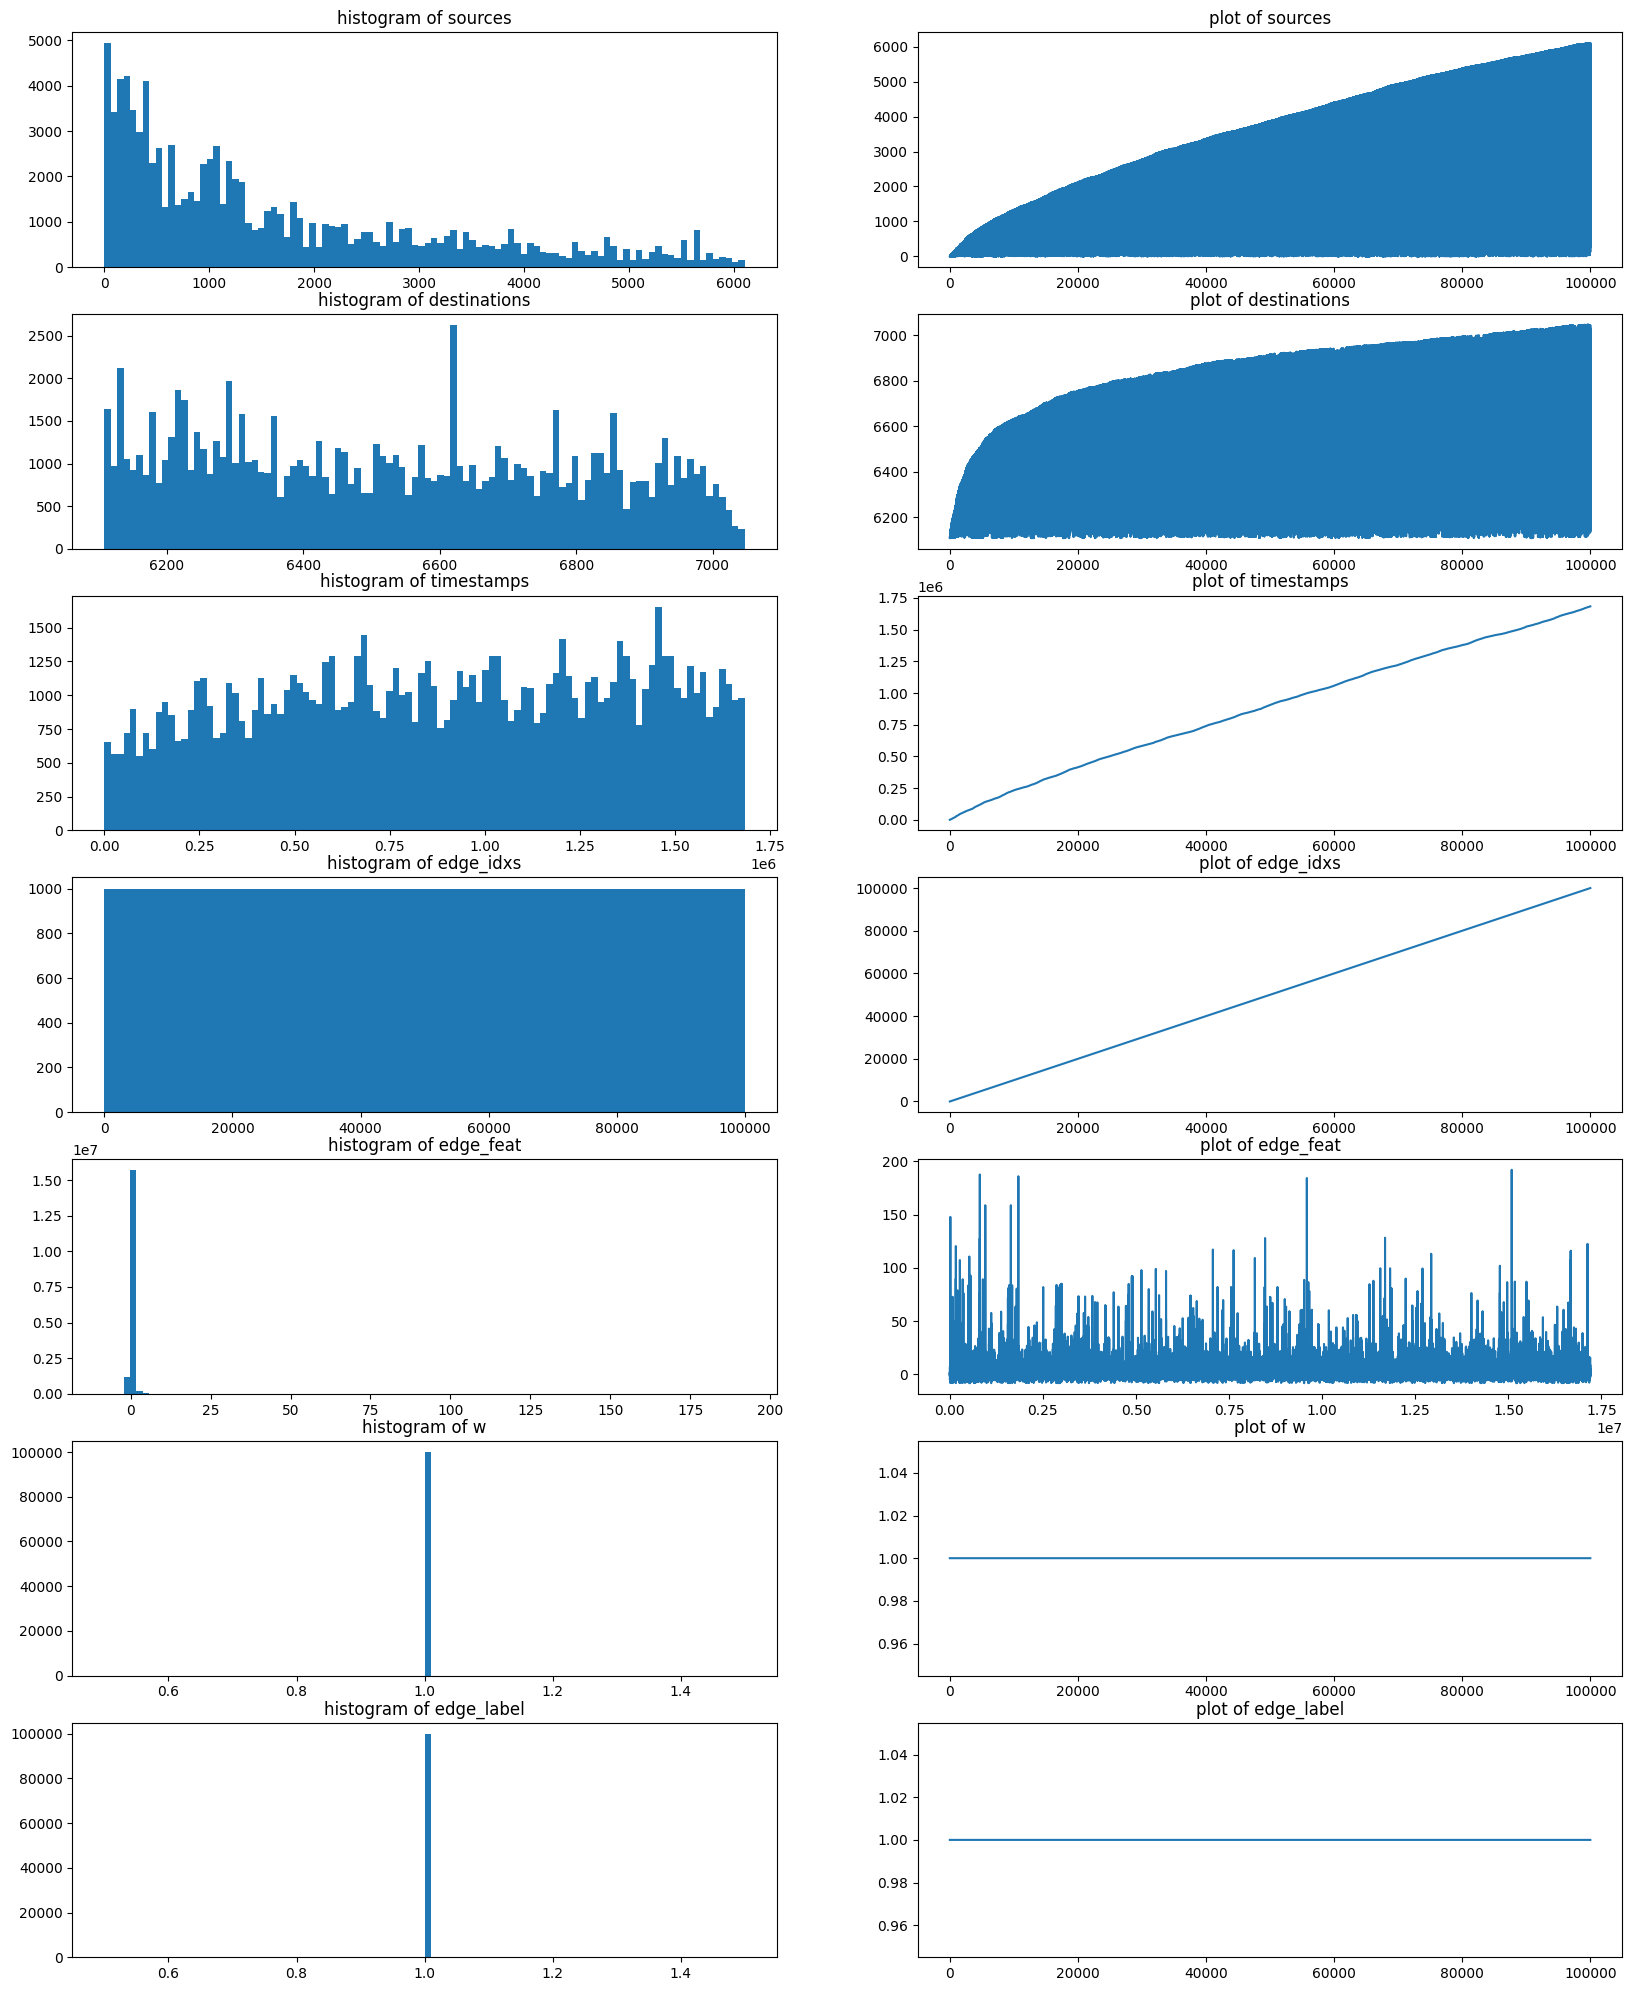

In [25]:
show_data(data_wiki)

In [4]:
data_wiki.keys()

dict_keys(['sources', 'destinations', 'timestamps', 'edge_idxs', 'edge_feat', 'w', 'edge_label'])

In [35]:
calculate_density(data_wiki)

Average Density of the Network: 0.40%


# Review

In [36]:
data_review = load_data("tgbl-review")

raw file found, skipping download
Dataset directory is  c:\Users\danie\OneDrive - Danmarks Tekniske Universitet\Dokumenter\6. semester\Bachelor\BachelorProject\tgb/datasets\tgbl_review
loading processed file


=============== Data shapes ================
Length of data:  7
Number of unique nodes:  4000
Number of edges:  96550
Number of unique timestamps:  4317

sources (96550,)
destinations (96550,)
timestamps (96550,)
edge_idxs (96550,)
edge_feat (96550, 1)
w (96550,)
edge_label (96550,)
============== Preview of attributes =================
sources [ 0  2  3  5  6  8 10 11 12 13]
destinations [1 1 4 4 7 9 1 1 4 1]
timestamps [ 956966400  961200000  962236800  966988800  973641600  992563200
  994204800 1006387200 1009584000 1011657600]
edge_idxs [ 1  2  3  4  5  6  7  8  9 10]
edge_feat [0.]
eats: 1
w [2.5849625  2.5849625  2.32192809 2.         2.5849625  2.5849625
 2.32192809 2.5849625  2.5849625  2.5849625 ]
edge_label [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


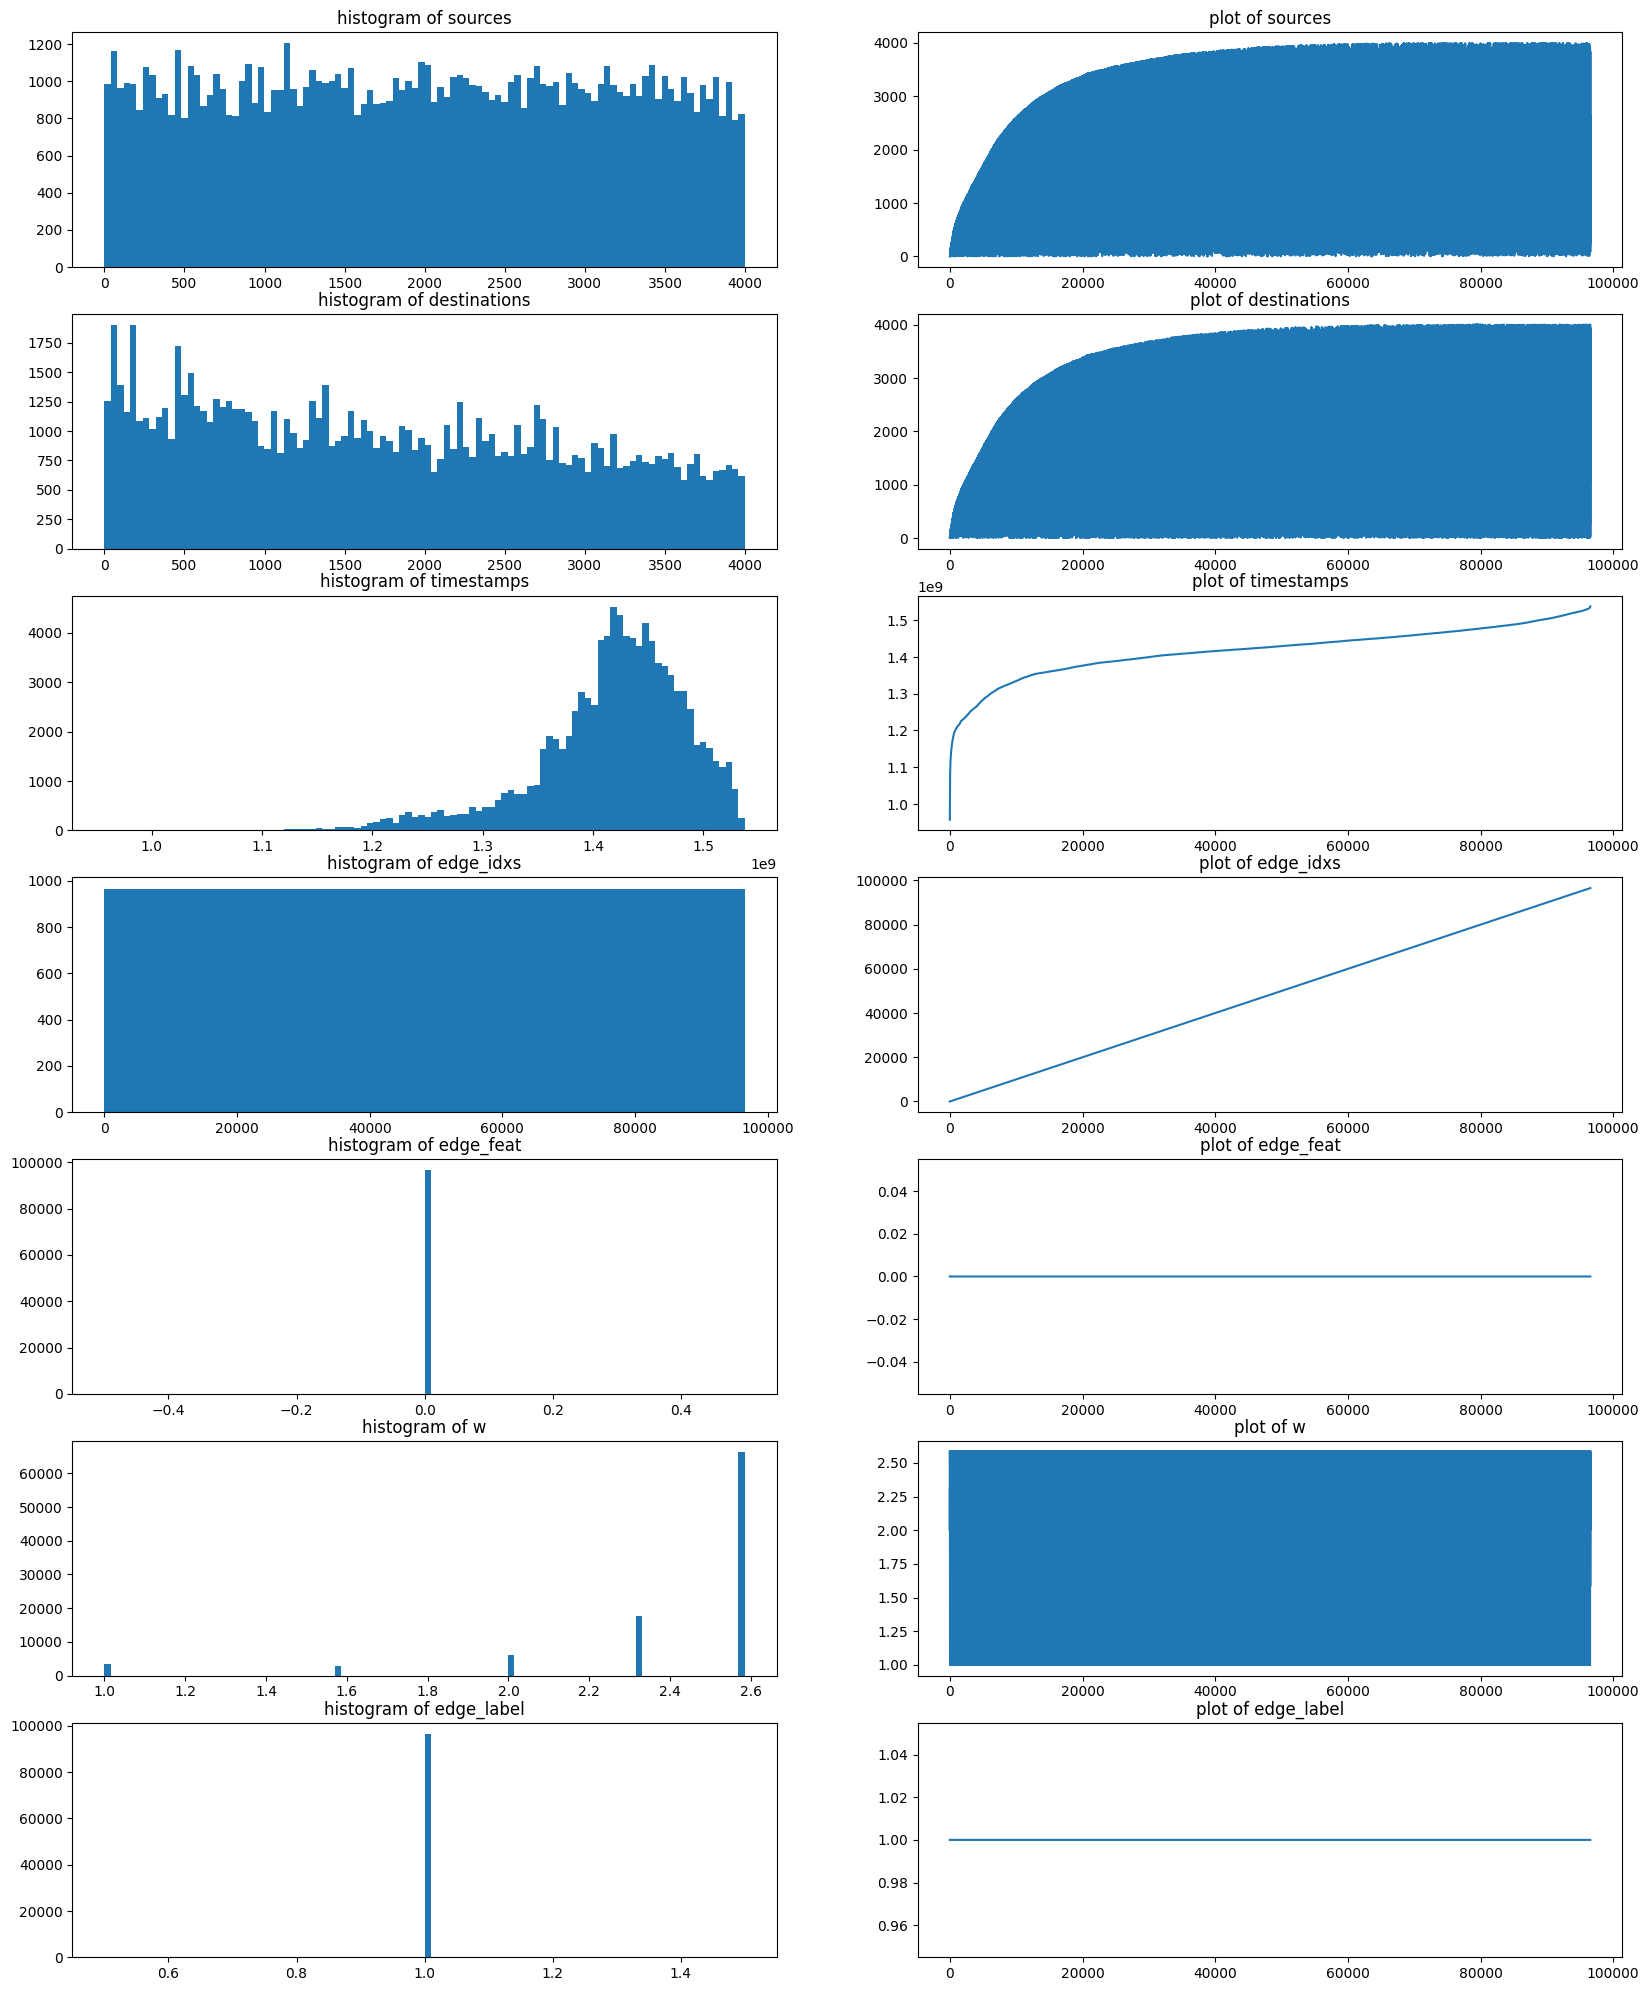

In [37]:
show_data(data_review, ign_keys=['edge_feat'])

In [38]:
calculate_density(data_review)

Average Density of the Network: 1.21%


# Flight

In [39]:
data_flight = load_data("tgbl-flight")

raw file found, skipping download
Dataset directory is  c:\Users\danie\OneDrive - Danmarks Tekniske Universitet\Dokumenter\6. semester\Bachelor\BachelorProject\tgb/datasets\tgbl_flight
loading processed file


=============== Data shapes ================
Length of data:  7
Number of unique nodes:  9206
Number of edges:  100000
Number of unique timestamps:  1383

sources (100000,)
destinations (100000,)
timestamps (100000,)
edge_idxs (100000,)
edge_feat (100000, 16)
w (100000,)
edge_label (100000,)
============== Preview of attributes =================
sources [ 0  2  4  6  8 10 12 14 16 18]
destinations [ 1  3  5  7  9 11 13 15 17 19]
timestamps [1.5463188e+09 1.5463188e+09 1.5463188e+09 1.5463188e+09 1.5463188e+09
 1.5463188e+09 1.5463188e+09 1.5463188e+09 1.5463188e+09 1.5463188e+09]
edge_idxs [ 1  2  3  4  5  6  7  8  9 10]
edge_feat [32. 49. 41.  6.  7. -1.]
eats: 16
w [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
edge_label [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


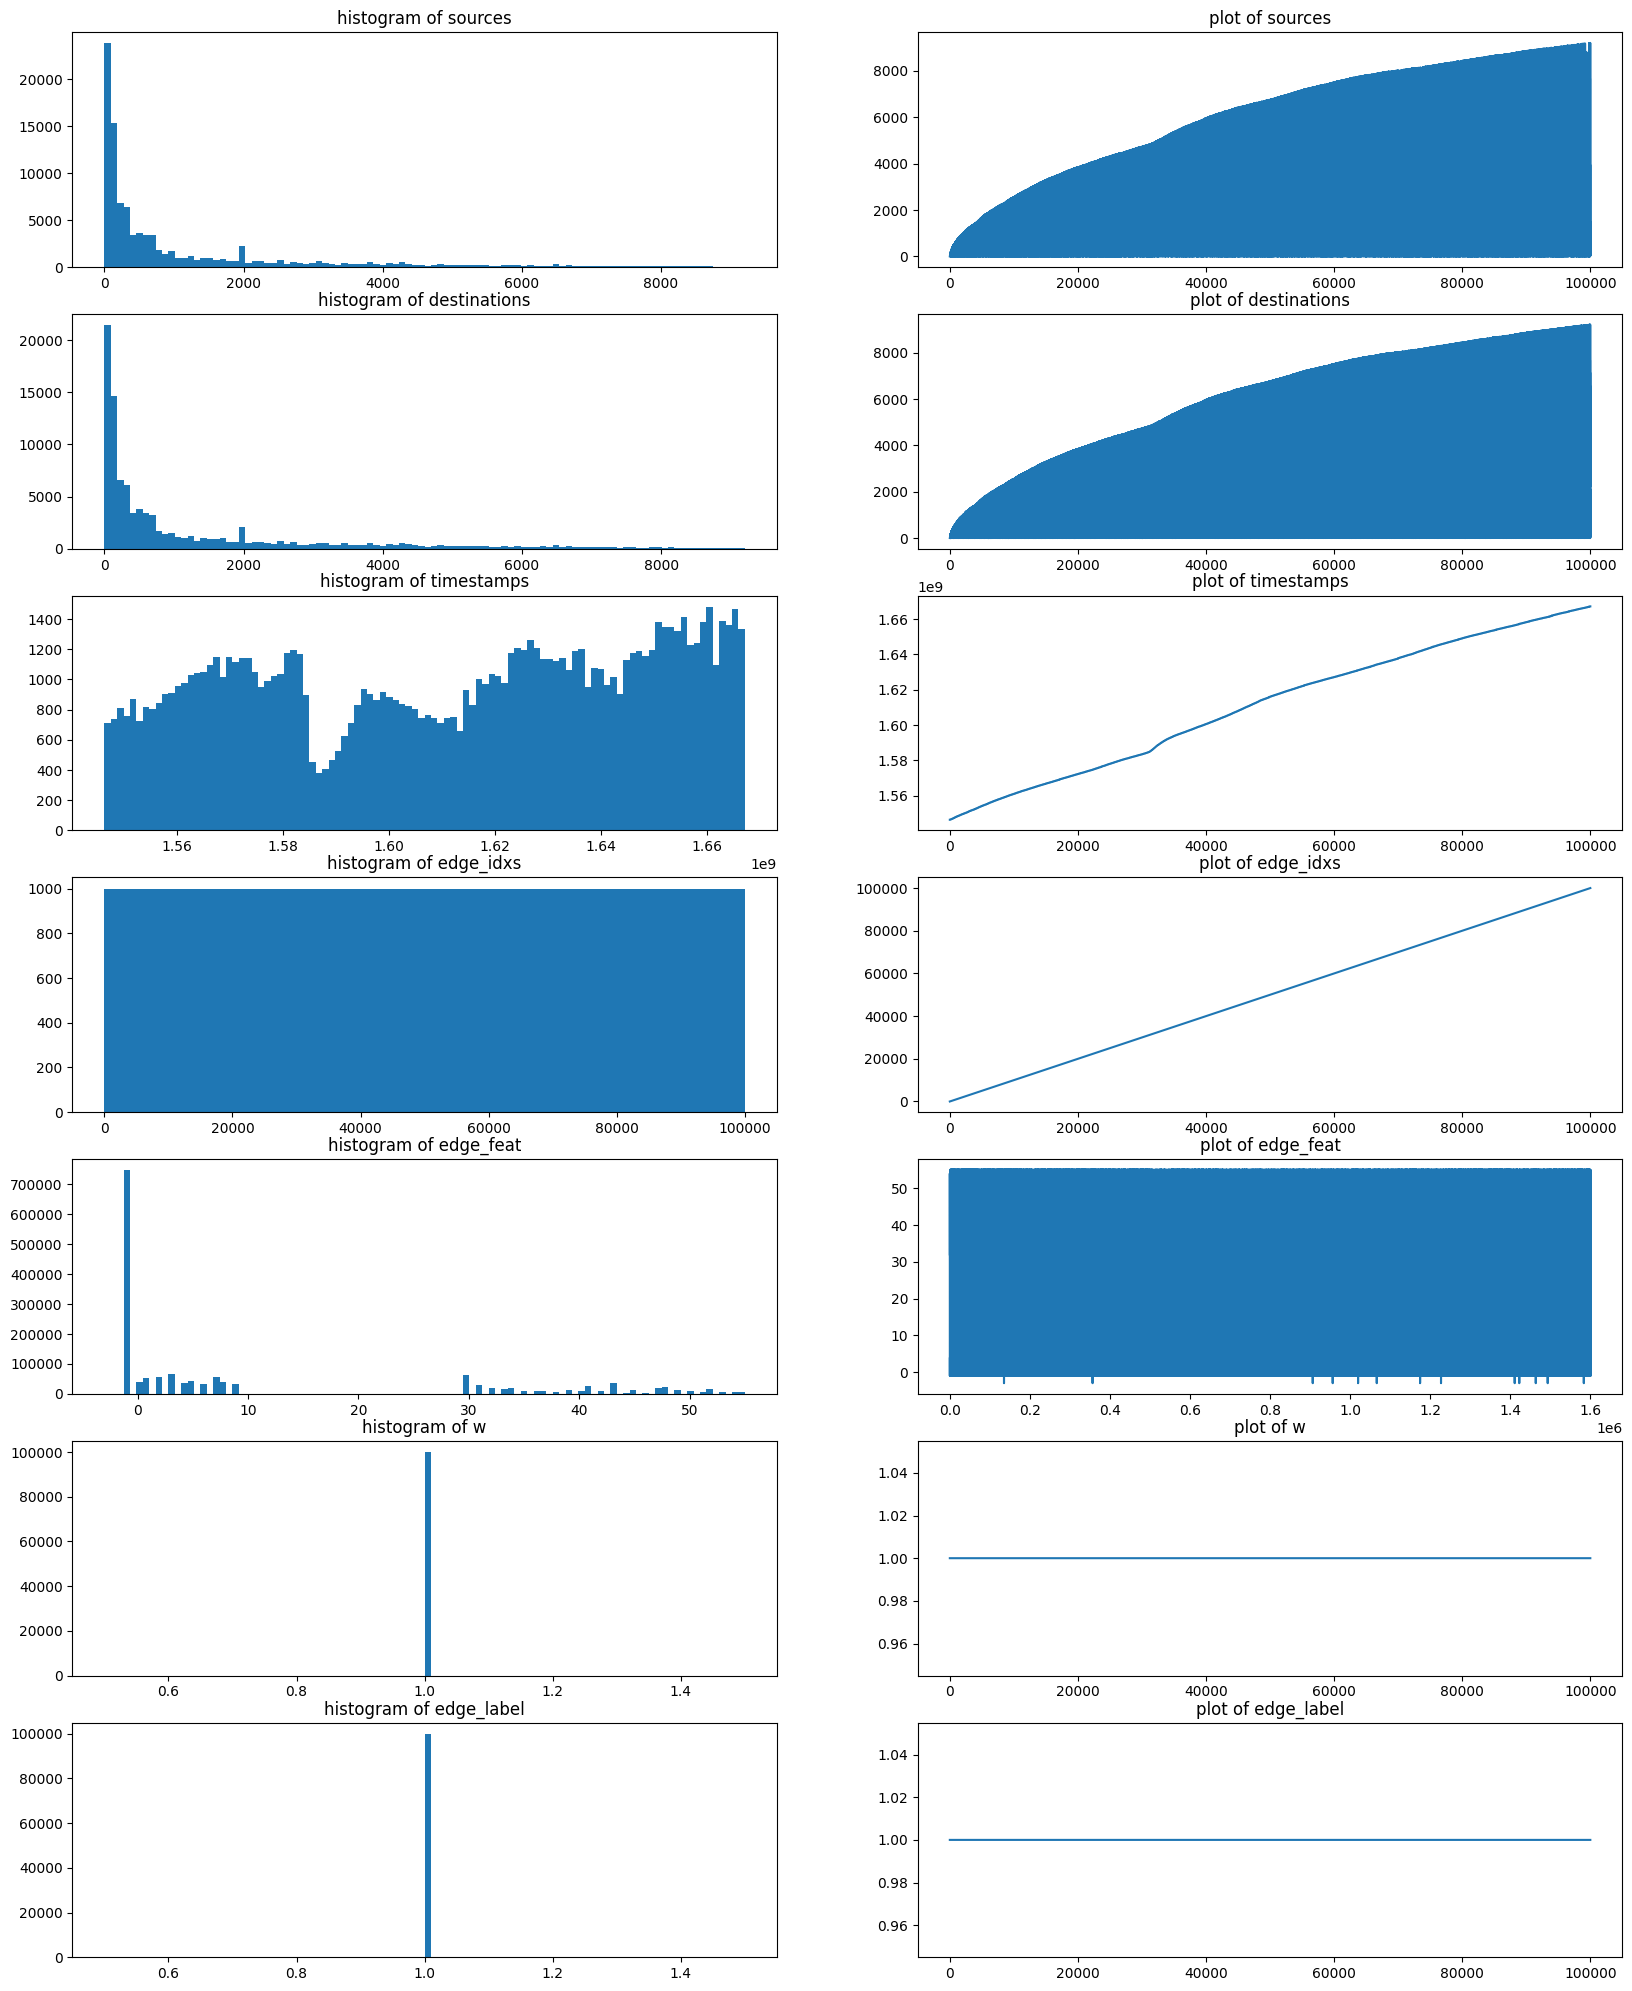

In [40]:
show_data(data_flight, ign_keys=['edge_feat'])

In [41]:
calculate_density(data_flight)

Average Density of the Network: 0.24%


# Coin

In [42]:
data_coin = load_data("tgbl-coin")

raw file found, skipping download
Dataset directory is  c:\Users\danie\OneDrive - Danmarks Tekniske Universitet\Dokumenter\6. semester\Bachelor\BachelorProject\tgb/datasets\tgbl_coin
loading processed file


=============== Data shapes ================
Length of data:  7
Number of unique nodes:  35177
Number of edges:  100000
Number of unique timestamps:  7143

sources (100000,)
destinations (100000,)
timestamps (100000,)
edge_idxs (100000,)
edge_feat (100000, 1)
w (100000,)
edge_label (100000,)
============== Preview of attributes =================
sources [ 0.  2.  4.  6.  8.  8. 11. 13. 15. 17.]
destinations [ 1.  3.  5.  7.  9. 10. 12. 14. 16. 18.]
timestamps [1.64881142e+09 1.64881142e+09 1.64881142e+09 1.64881142e+09
 1.64881142e+09 1.64881142e+09 1.64881142e+09 1.64881142e+09
 1.64881142e+09 1.64881144e+09]
edge_idxs [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
edge_feat [0.]
eats: 1
w [ 9.64565843 13.95664841  9.35022196 11.94196093 13.6748623  13.98245888
 10.04324188 10.96650545 12.27641524 13.28785664]
edge_label [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


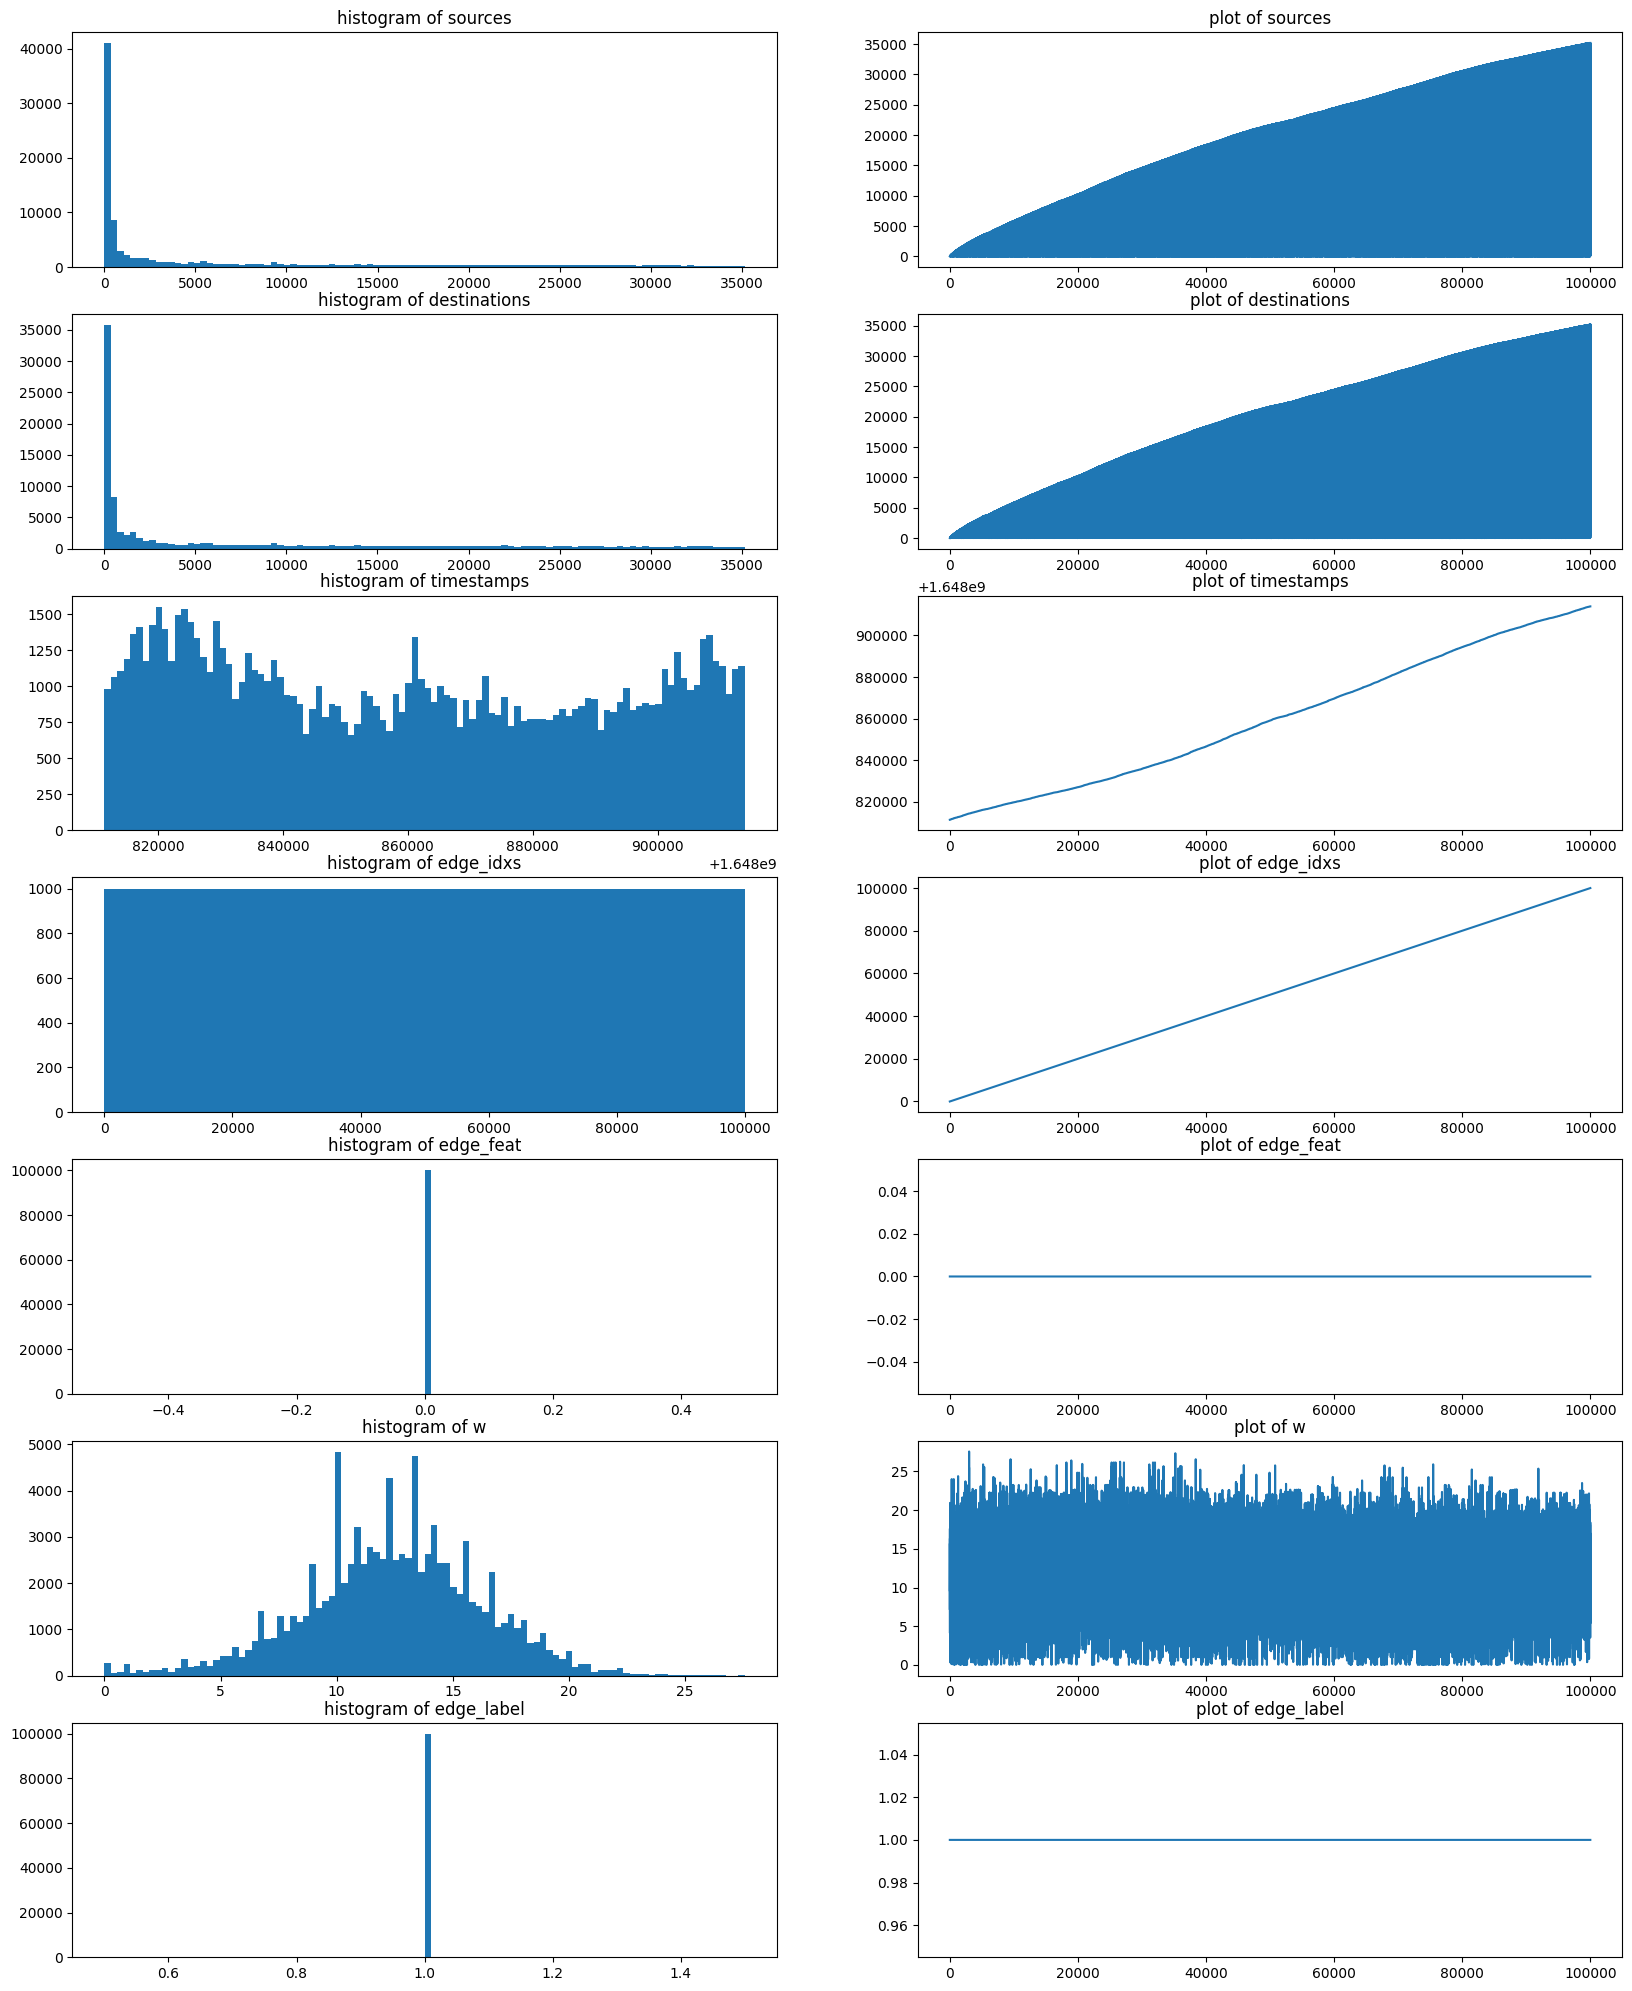

In [43]:
show_data(data_coin, ign_keys=['edge_feat'])

In [44]:
calculate_density(data_coin)

Average Density of the Network: 0.02%


# Comment

In [45]:
data_comment = load_data("tgbl-comment")

raw file found, skipping download
Dataset directory is  c:\Users\danie\OneDrive - Danmarks Tekniske Universitet\Dokumenter\6. semester\Bachelor\BachelorProject\tgb/datasets\tgbl_comment
loading processed file


=============== Data shapes ================
Length of data:  7
Number of unique nodes:  11743
Number of edges:  100000
Number of unique timestamps:  99410

sources (100000,)
destinations (100000,)
timestamps (100000,)
edge_idxs (100000,)
edge_feat (100000, 2)
w (100000,)
edge_label (100000,)
============== Preview of attributes =================
sources [ 0.  1.  2.  4.  5.  6.  7.  8. 10.  9.]
destinations [ 0.  1.  3.  4.  5.  6.  7.  9. 11.  9.]
timestamps [1.13436519e+09 1.13436572e+09 1.13436775e+09 1.13437105e+09
 1.13437166e+09 1.13437527e+09 1.13438017e+09 1.13438138e+09
 1.13438412e+09 1.13438650e+09]
edge_idxs [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
edge_feat [0. 0.]
eats: 2
w [ 12. 111.  13.   6.  42.   9.  11.  17. 139.   7.]
edge_label [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


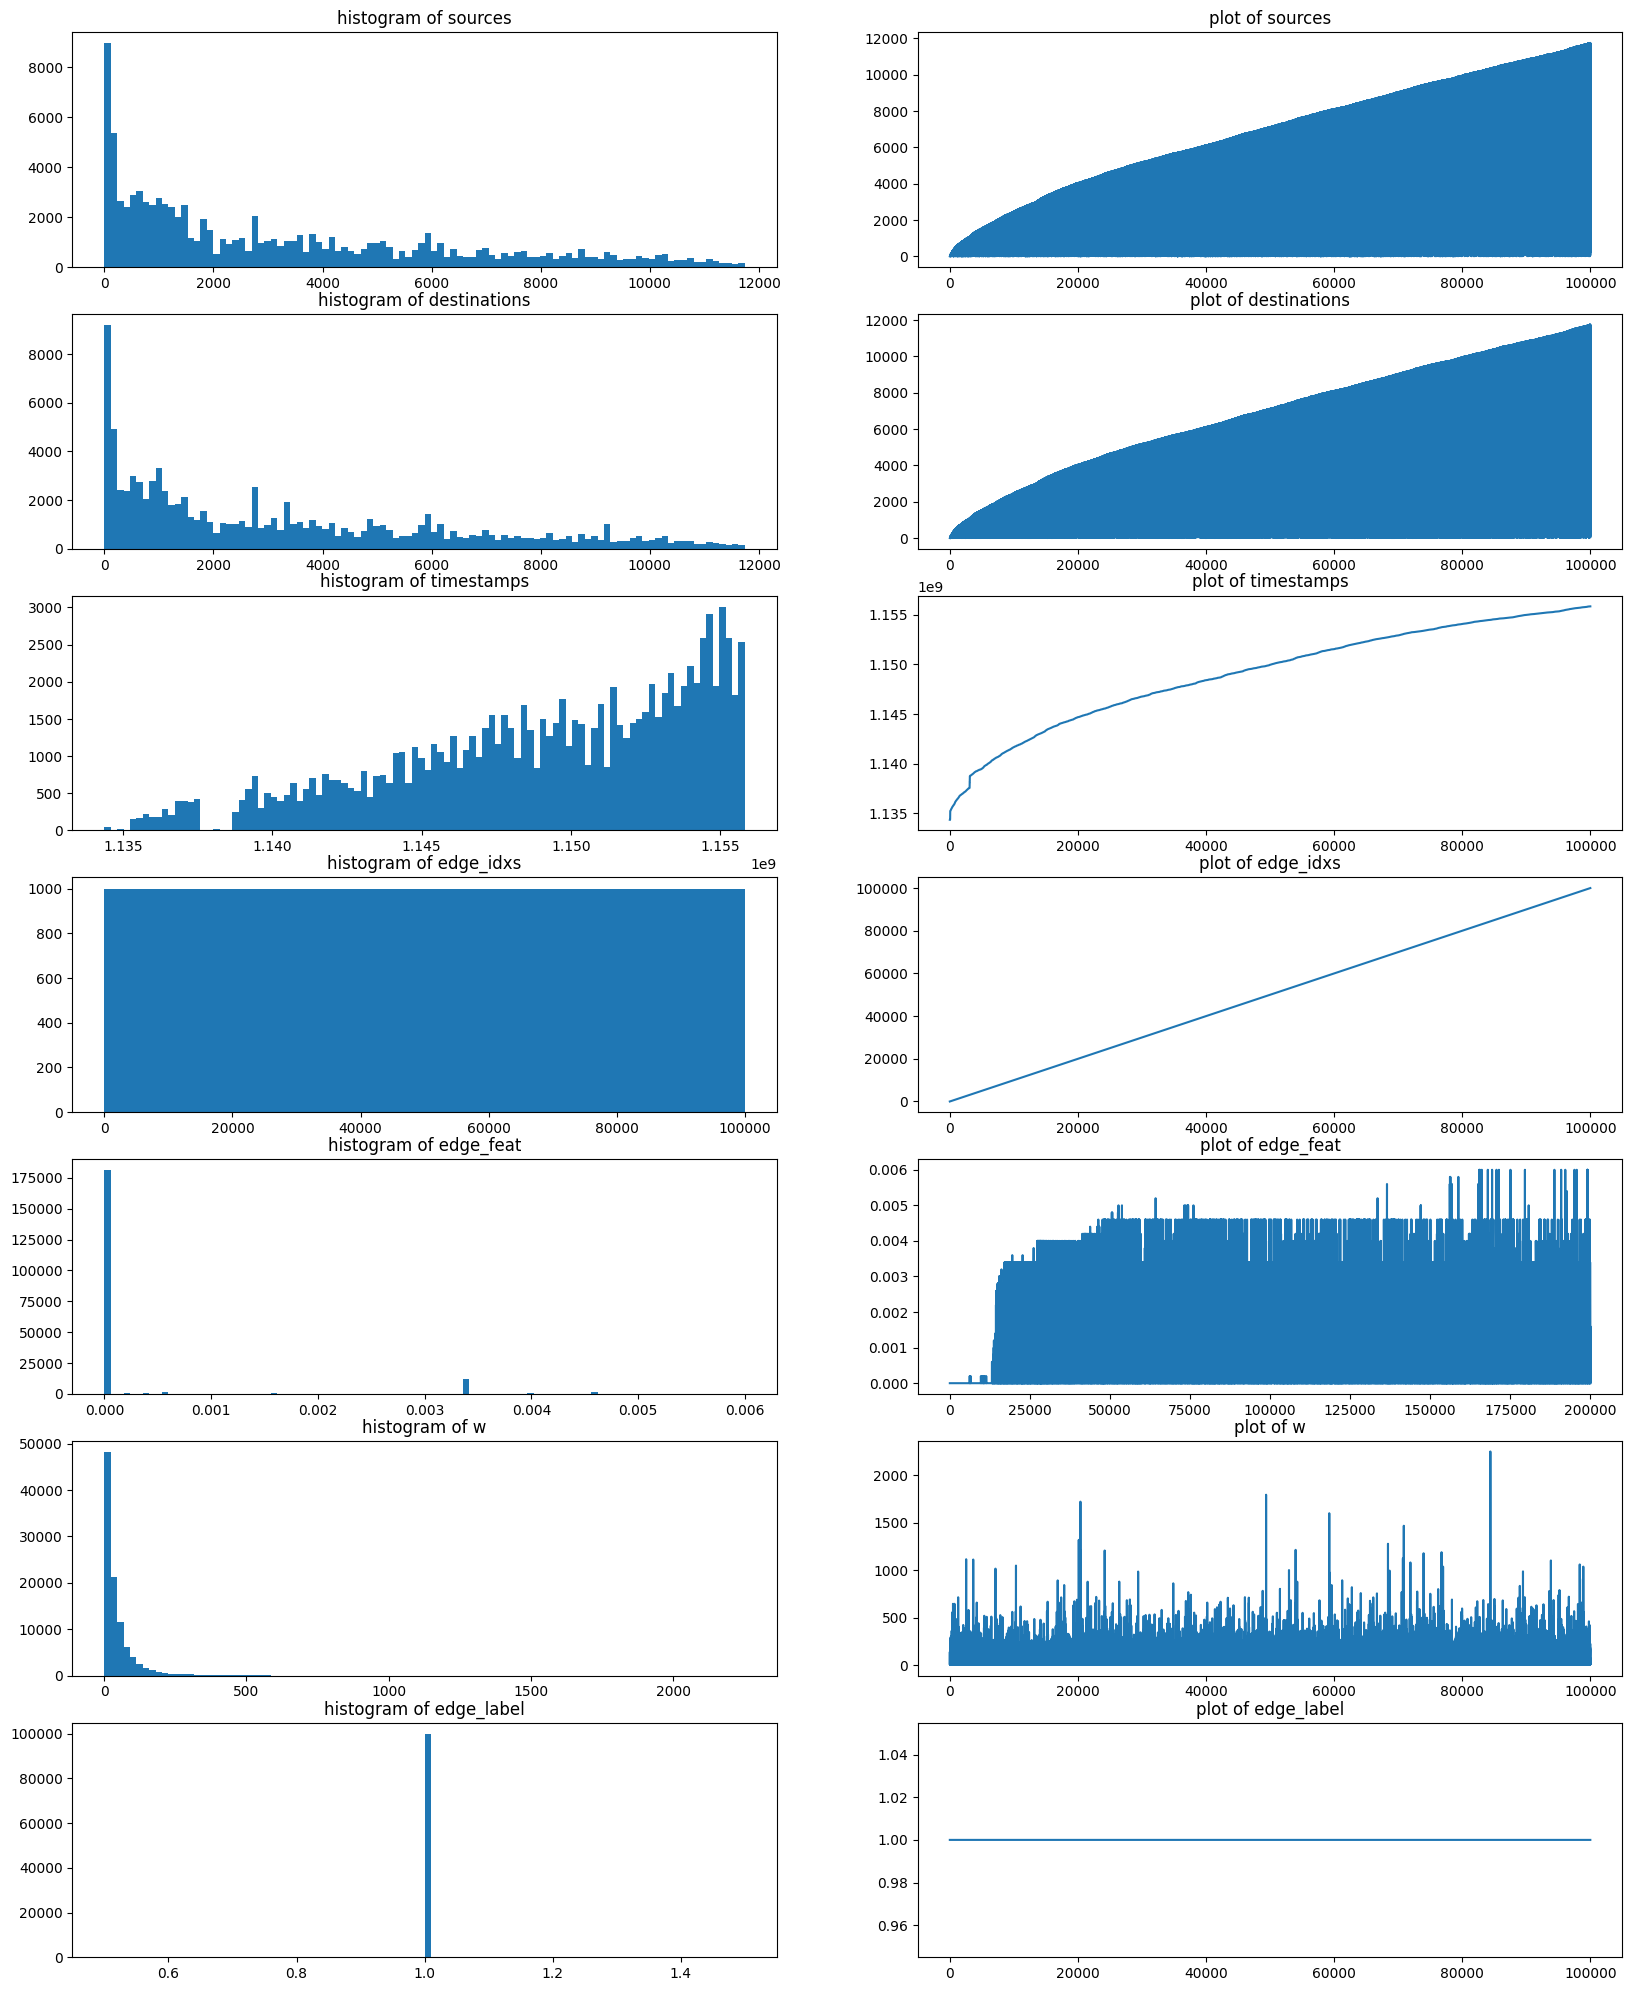

In [46]:
show_data(data_comment, ign_keys=['edge_feat'])

In [48]:
calculate_density(data_comment)

Average Density of the Network: 0.15%
